<center><img src="data/redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [9]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("data/netflix_data.csv")

In [16]:
# Start coding here! Use as many cells as you like
# Explore the dataset structure
print("Dataset shape:", netflix_df.shape)
print("\nColumn info:")
print(netflix_df.info())
print("\nFirst few rows:")
print(netflix_df.head())

# Check unique values in 'type' column to understand the data
print("\nUnique types:", netflix_df['type'].unique())
# Filter for movies only (not TV shows) from the 1990s
movies_1990s = netflix_df[
    (netflix_df['type'] == 'Movie') &
    (netflix_df['release_year'] >= 1990) &
    (netflix_df['release_year'] < 2000)
]

print(f"Number of movies from 1990s: {len(movies_1990s)}")
print("\nSample of 1990s movies:")
print(movies_1990s[['title', 'release_year', 'duration', 'genre']].head())
# Check the data type and sample values of the duration column
print("Duration column data type:", movies_1990s['duration'].dtype)
print("Sample duration values:")
print(movies_1990s['duration'].head(10))
print("\nUnique duration values (first 20):")
print(movies_1990s['duration'].unique()[:20])# Handle duration extraction based on the actual data format
# First convert to string if needed, then extract numeric values
movies_1990s = movies_1990s.copy()  # Avoid SettingWithCopyWarning

if movies_1990s['duration'].dtype == 'object':
    # If it's already string format like "90 min" - using raw string to avoid escape sequence warning
    movies_1990s['duration_minutes'] = movies_1990s['duration'].str.extract(r'(\d+)').astype(int)
else:
    # If it's already numeric (just duration in minutes)
    movies_1990s['duration_minutes'] = movies_1990s['duration'].astype(int)

print("Sample duration_minutes:")
print(movies_1990s['duration_minutes'].head(10))

# Question 1: What was the most frequent movie duration in the 1990s?
print("\n=== QUESTION 1: Most Frequent Movie Duration ===")
duration_counts = movies_1990s['duration_minutes'].value_counts()
print("Top 10 most frequent durations:")
print(duration_counts.head(10))

# Get the most frequent duration
most_frequent_duration = duration_counts.index[0]
duration = most_frequent_duration  # Save as requested variable name
print(f"\nMost frequent movie duration in 1990s: {duration} minutes")
print(f"Number of movies with this duration: {duration_counts.iloc[0]}")

# Question 2: Count short action movies (< 90 minutes) in the 1990s
print("\n=== QUESTION 2: Short Action Movies ===")

# First, let's examine the genre column to understand its format
print("Sample genre values:")
print(movies_1990s['genre'].head(10))
print("\nUnique genres (first 20):")
print(movies_1990s['genre'].unique()[:20])

# Filter for action movies (genres might contain multiple genres separated by commas)
action_movies_1990s = movies_1990s[
    movies_1990s['genre'].str.contains('Action', case=False, na=False)
]

print(f"Total action movies in 1990s: {len(action_movies_1990s)}")

# Filter for short action movies (< 90 minutes)
short_action_movies = action_movies_1990s[
    action_movies_1990s['duration_minutes'] < 90
]

short_movie_count = len(short_action_movies)
print(f"Short action movies (< 90 minutes) in 1990s: {short_movie_count}")

# Display some examples of short action movies
if short_movie_count > 0:
    print("\nExamples of short action movies:")
    print(short_action_movies[['title', 'release_year', 'duration_minutes', 'genre']].head())
else:
    print("No short action movies found in the 1990s dataset")

# Summary of results
print("\n=== FINAL RESULTS ===")
print(f"duration = {duration}")
print(f"short_movie_count = {short_movie_count}")


Dataset shape: (4812, 11)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None

First few rows:
  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luke


=== ADDITIONAL EXPLORATORY ANALYSIS ===


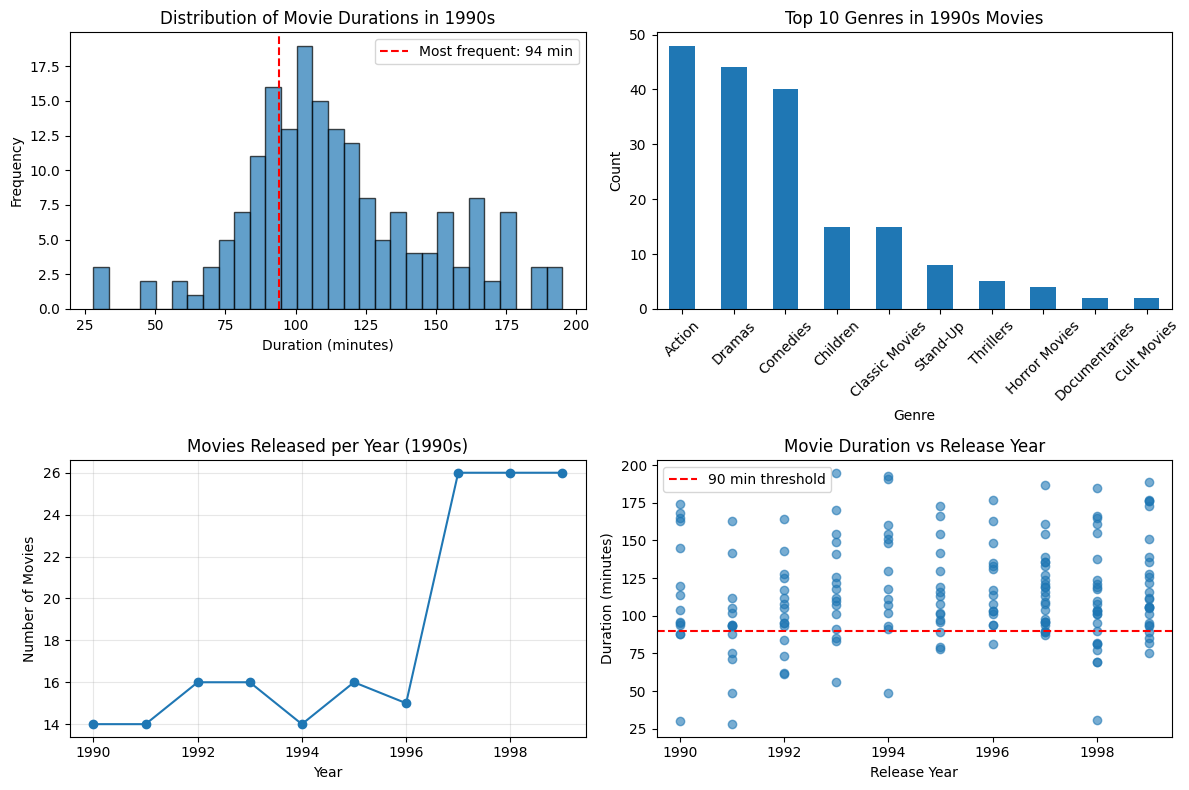


=== SUMMARY STATISTICS ===
Total movies in 1990s: 183
Average duration: 115.1 minutes
Median duration: 108.0 minutes
Standard deviation: 33.2 minutes
Shortest movie: 28 minutes
Longest movie: 195 minutes

Movies by duration category:
Short movies (< 90 min): 34
Medium movies (90-120 min): 84
Long movies (> 120 min): 65


In [17]:
# Additional exploratory analysis and visualizations
print("\n=== ADDITIONAL EXPLORATORY ANALYSIS ===")

# Distribution of movie durations in the 1990s
plt.figure(figsize=(12, 8))

# Create subplot layout
plt.subplot(2, 2, 1)
plt.hist(movies_1990s['duration_minutes'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Durations in 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.axvline(duration, color='red', linestyle='--', label=f'Most frequent: {duration} min')
plt.legend()

# Top genres in the 1990s
plt.subplot(2, 2, 2)
# Split genres by comma and count individual genres
all_genres = []
for genre_list in movies_1990s['genre'].dropna():
    genres = [g.strip() for g in str(genre_list).split(',')]
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts.plot(kind='bar', rot=45)
plt.title('Top 10 Genres in 1990s Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()

# Movies released per year in the 1990s
plt.subplot(2, 2, 3)
yearly_counts = movies_1990s['release_year'].value_counts().sort_index()
yearly_counts.plot(kind='line', marker='o')
plt.title('Movies Released per Year (1990s)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)

# Duration vs Release Year scatter plot
plt.subplot(2, 2, 4)
plt.scatter(movies_1990s['release_year'], movies_1990s['duration_minutes'], alpha=0.6)
plt.title('Movie Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.axhline(90, color='red', linestyle='--', label='90 min threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total movies in 1990s: {len(movies_1990s)}")
print(f"Average duration: {movies_1990s['duration_minutes'].mean():.1f} minutes")
print(f"Median duration: {movies_1990s['duration_minutes'].median():.1f} minutes")
print(f"Standard deviation: {movies_1990s['duration_minutes'].std():.1f} minutes")
print(f"Shortest movie: {movies_1990s['duration_minutes'].min()} minutes")
print(f"Longest movie: {movies_1990s['duration_minutes'].max()} minutes")

# Count movies by duration categories
short_movies = len(movies_1990s[movies_1990s['duration_minutes'] < 90])
medium_movies = len(movies_1990s[(movies_1990s['duration_minutes'] >= 90) & (movies_1990s['duration_minutes'] <= 120)])
long_movies = len(movies_1990s[movies_1990s['duration_minutes'] > 120])

print(f"\nMovies by duration category:")
print(f"Short movies (< 90 min): {short_movies}")
print(f"Medium movies (90-120 min): {medium_movies}")
print(f"Long movies (> 120 min): {long_movies}")
